In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


In [4]:
df = pd.read_csv('Cereals.cvs')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [9]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [12]:
LE = LabelEncoder()
df['mfr_encoded'] = LE.fit_transform(df['mfr'])
df['type_encoded'] = LE.fit_transform(df['type'])

In [13]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encoded,type_encoded
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2,0
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1,0


In [15]:
df_cluster = df.drop(columns = ["mfr","type","name"])

In [16]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster)

# WARD

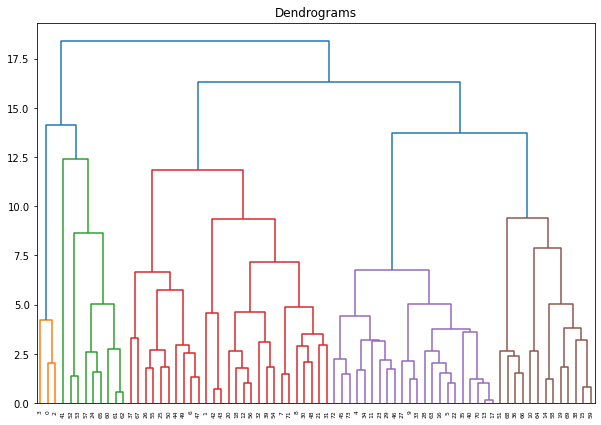

In [25]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

In [82]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
pred_y = cluster.fit_predict(X_std)

In [34]:
df_ward = df
df_ward['cluster'] = pred_y

In [29]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encoded,type_encoded,cluster
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3,0,3
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2,0,3
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2,0,3
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1,0,4


# single

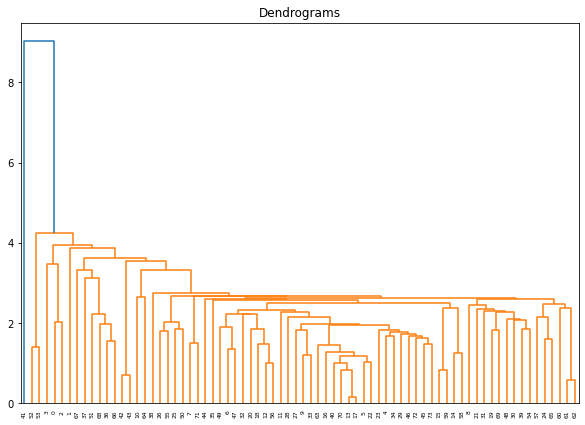

In [30]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='single'))

In [31]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
pred_y = cluster.fit_predict(X_std)

In [35]:
df_single = df
df_single['cluster'] = pred_y

In [36]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encoded,type_encoded,cluster
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2,0,0
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1,0,0


# complete

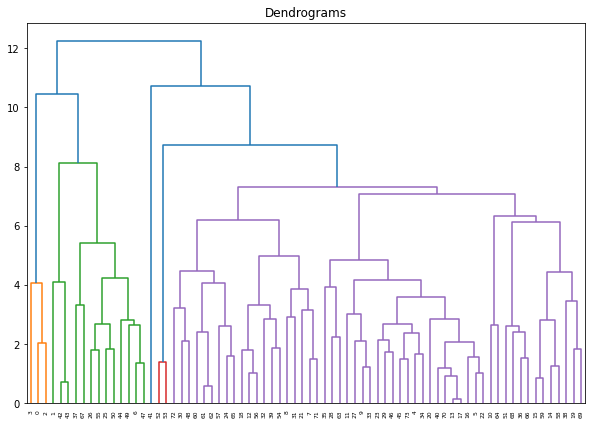

In [37]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='complete'))

In [38]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
pred_y = cluster.fit_predict(X_std)

In [39]:
df_complete = df
df_complete['cluster'] = pred_y

In [40]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encoded,type_encoded,cluster
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3,0,1
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5,0,4
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2,0,1
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2,0,1
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1,0,0


# average

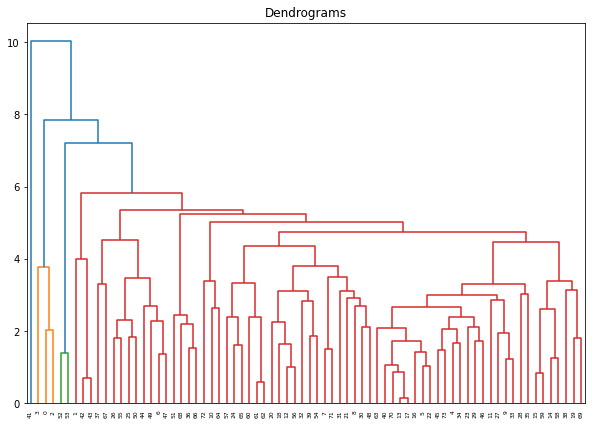

In [41]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='average'))

In [42]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
pred_y = cluster.fit_predict(X_std)

In [43]:
df_average = df
df_average['cluster'] = pred_y

In [44]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encoded,type_encoded,cluster
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3,0,1
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,2,0,1
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,2,0,1
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,1,0,0


# Question 1

# Question 2

# Question 3

In [50]:
df_cluster_partition, X_test = train_test_split(df_cluster,  test_size=0.33, random_state=42)

In [52]:
scaler = StandardScaler()
X_data_partition = scaler.fit_transform(df_cluster_partition)

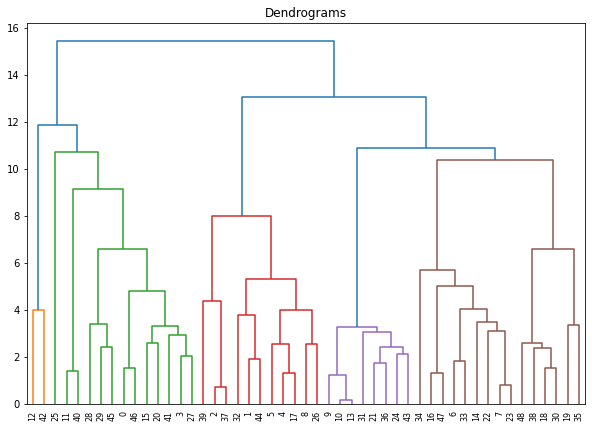

In [53]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_data_partition, method='ward'))

In [78]:
cluster_partition = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances = True)
pred_y = cluster.fit_predict(X_data_partition)

In [66]:
df_ward_partition = df_cluster_partition
df_ward_partition['cluster'] = pred_y

In [67]:
cluster.distances_

array([ 0.14586727,  0.68554468,  0.80297696,  1.20900831,  1.2831927 ,
        1.30905778,  1.3985276 ,  1.5102988 ,  1.52567246,  1.70839482,
        1.80616905,  1.89032079,  2.03979566,  2.12226123,  2.36475342,
        2.40003956,  2.41019699,  2.52715291,  2.53493936,  2.55723047,
        2.58615073,  2.92914404,  3.06481108,  3.08794062,  3.2548095 ,
        3.30032482,  3.32321805,  3.37167395,  3.47337956,  3.76912857,
        3.96236792,  3.99910709,  4.04428664,  4.37231763,  4.79412544,
        4.98470135,  5.31810709,  5.67864079,  6.58835874,  6.59028627,
        8.00271706,  9.11130963, 10.36297919, 10.71230494, 10.85748114,
       11.86603978, 13.03716293, 15.42580873])

In [69]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(df_cluster_partition, pred_y)
print(clf.centroids_)

[[1.11333333e+02 2.53333333e+00 5.33333333e-01 2.34000000e+02
  1.13333333e+00 1.95333333e+01 4.20000000e+00 6.63333333e+01
  5.50000000e+01 2.13333333e+00 1.05333333e+00 1.00866667e+00
  4.18949329e+01 2.13333333e+00 0.00000000e+00 0.00000000e+00]
 [8.66666667e+01 2.58333333e+00 3.33333333e-01 1.06250000e+02
  2.58333333e+00 1.52500000e+01 3.25000000e+00 9.79166667e+01
  1.66666667e+01 2.25000000e+00 9.02500000e-01 8.00833333e-01
  5.67440454e+01 4.25000000e+00 0.00000000e+00 1.00000000e+00]
 [1.25454545e+02 3.09090909e+00 2.27272727e+00 1.46818182e+02
  2.90909091e+00 1.39090909e+01 9.00000000e+00 1.43181818e+02
  2.27272727e+01 3.00000000e+00 1.13545455e+00 7.12727273e-01
  3.79150803e+01 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 [6.00000000e+01 4.00000000e+00 5.00000000e-01 2.00000000e+02
  1.15000000e+01 7.50000000e+00 2.50000000e+00 3.25000000e+02
  2.50000000e+01 3.00000000e+00 1.00000000e+00 4.15000000e-01
  7.65652085e+01 2.00000000e+00 0.00000000e+00 3.00000000e+00]
 [1.

In [86]:
distance, weight = get_distances(X_std,cluster_partition)
linkage_matrix = np.column_stack([cluster_partition.children_, distance, weight]).astype(float)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'children_'

In [71]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances = True)
pred_y = cluster.fit_predict(X_std)

In [72]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_std, pred_y)
print(clf.centroids_)

[[ 0.50788112  0.48995753  0.55555556  0.01178062  0.38863752 -0.05464304
   0.2060007   0.60246494  0.02599333  0.67950599  0.63636892 -0.54480202
  -0.04560458  0.38366532 -0.11704115]
 [ 0.03375456  0.16733069 -0.46153846  1.0566519  -0.58432387  1.32368438
  -0.96661865 -0.6727403   0.85908392 -0.26162798 -0.20220332  0.96891589
   0.06456503 -0.24755103 -0.11704115]
 [-1.37127903 -0.2466182  -1.         -1.9522265   0.08281161  0.13460058
  -1.12207955 -0.12093378 -0.88871763 -0.26162798 -1.16200394  0.0357871
   1.55450298  0.35623947 -0.11704115]
 [-2.21690109  1.3911796  -0.33333333  0.17396959  3.66616803 -2.08601757
  -0.79487138  3.00414868 -0.18308346  0.94840141 -0.20220332 -1.857851
   2.2579563  -0.18679223 -0.11704115]
 [ 0.17390311 -0.86345114  0.          0.13710846 -0.62064045 -0.4945419
   0.87791482 -0.70527255 -0.18308346 -0.70163866 -0.20220332  0.3017766
  -0.89605497 -0.35733112 -0.11704115]
 [-0.35653255  1.3911796   0.         -1.97503432 -0.90390973  0.32863

In [73]:
def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

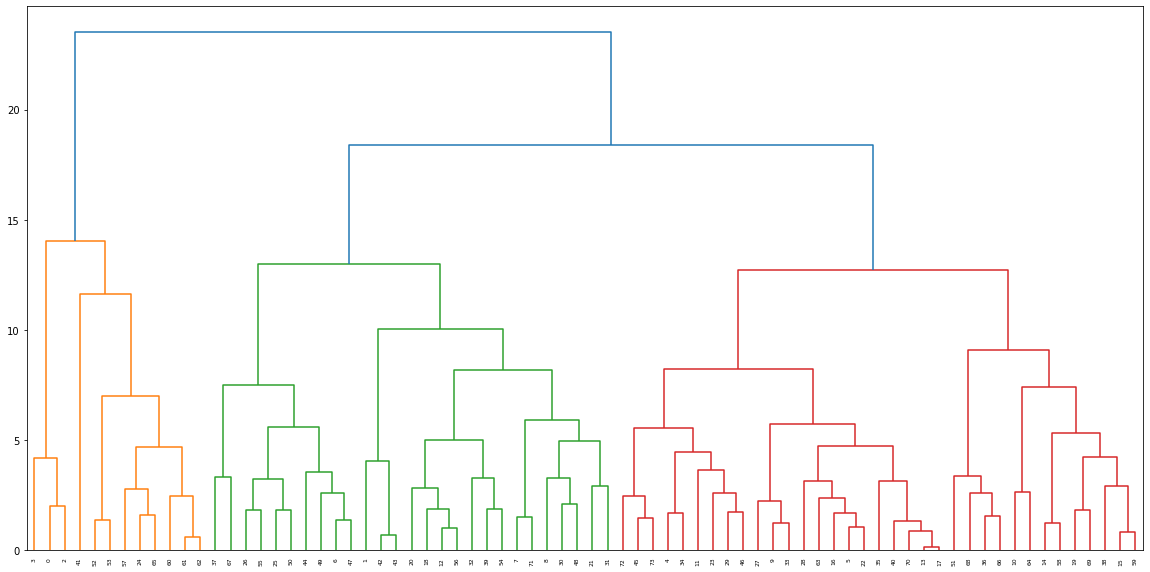

In [83]:
distance, weight = get_distances(X_std,cluster)
linkage_matrix = np.column_stack([cluster.children_, distance, weight]).astype(float)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

# question 4